# Bruker N8 Horizon GISAXS Analysis Pipeline.ipynb

#### Author: B. Jiang
#### Version: 1.1.0 updated by B. Jiang, last modified: 07/2025
*credit: deepseek-R1

Can be used to do:
1. convert the RGBA TIFF image saved from the Bruker DIFFRAC.COMMANDER software (use BB colormaps in the software) to a grayscale TIFF and save
2. convert the grayscale TIFF to a 2D numpy array
3. Define the ROI
4. Calculate q

v1.1.0: 
- Major Updates:
    - Most functions are included in the function package GISAXS_static_analysis_for_N8_Horizon.py
    - Introduced a new parameter: detector_virtual_rotation, which is extracted from the direct beam locating pipeline and helps correcting any tilt of the samples on the GISAXS stage
    - The beam center x (x0) is redefined based on the reflected beam
    
## Notes of the Data:
Data name: **ISR_Summer24_run9_56.5deg_500eV (example)**<br/>

## 1. Setup 
- Importing Functions and Packages from a Separated File 

In [1]:
# For jupyter intellisense
%config IPCompleter.greedy=True

# All functions and required packages are stored in MOSS_function.ipynb in the parent folder. # -i: Inherit notebook's variables
%run -i ../GISAXS_static_analysis_for_N8_Horizon_v1.1.py 

In [2]:
# Check the directory, MAKE SURE this pipeline and the data are in the same directory
%pwd

'C:\\Users\\benli_jiang\\Documents\\N8-GISAXS\\trial3_ISR_Summer24_run9_56.5deg_500eV'

In [18]:
# %matplotlib widget
%matplotlib inline

## 2. Load and check the data
### 2.1. Make a directory for saving results

In [4]:
data_dir = './Results'

os.makedirs(data_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % os.getcwd()+data_dir[1:])

Results from this analysis will be stashed in the directory C:\Users\benli_jiang\Documents\N8-GISAXS\trial3_ISR_Summer24_run9_56.5deg_500eV/Results


### 2.2. Input the GISAXS metadata from the DIFFRAC.SAXS software or experimental notes
#### 2.2.1. GISAXS metadata required for the analysis

##### 2.2.1.1. Calculate the x-ray photon energy for searching the critical angle

In [5]:
########User Input Starts########
photon_wavelength = 1.54184 #Angstrom, from the DIFFRAC.SAXS - wavelength used for the scan display
########User Input Ends########

h = 6.62607 * 1E-34
c = 3E8
photon_energy = ((h*c)/(photon_wavelength*1e-10))/(1.602*1E-19) #[eV]
print('X-ray photon energy for this analysis is %s eV' %photon_energy)

X-ray photon energy for this analysis is 8047.768112460991 eV


##### 2.2.1.2. Input the rest of the GISAXS metadata
x-ray critical angle database: https://henke.lbl.gov/optical_constants/pert_form.html

In [6]:
########User Input Starts########

# Direct Beam center position (based on the detector position after the angle/sample tilt correction)
beam_center_x = 1020
beam_center_y = 1040

detector_distance = 663.6 #mm, detector to sample distance
pixel_size = 68 #um, detector pixel size(68 um for 2048x2048, 136 um for 1024x1024)

incident_angle = 0.2 #deg

#define your sample's materials critical angle
alpha_c = 0.223*(np.pi/180) #silicon, 8047.77 eV

########User Input Ends########

#incident beam info for the analysis
x0 = beam_center_x
y0 = beam_center_y

#the following are detector distance, Energy and incident angles.
d=detector_distance ## [mm]
alpha_i=incident_angle*(np.pi/180) ##


#### 2.2.2. GISAXS metadata NOT required for the analysis, recorded here just for future reference

In [7]:
detector_name = 'VANTEC-500'
collect_time = 10800 #second

### 2.3. Convert, save and open the TIFF image
#### 2.3.1. convert the rgba TIFF image to grayscale and save

In [8]:
########User Input Starts########
save_master_filename = 'trial3_ISR_Summer24_run9_56.5deg_500eV' # this governs all the saved files' filename from this pipeline!!!
input_tiff_file = 'trial3_ISR_Summer24_run9_56.5deg_500eV.tiff'  # RGBA TIFF file to convert
########User Input Ends########

output_tiff_file = data_dir + '/'+ save_master_filename+ 'output_grayscale.tif' # Desired output grayscale TIFF file path


convert_rgba_tiff_to_grayscale(input_tiff_file, output_tiff_file)

Successfully converted 'trial3_ISR_Summer24_run9_56.5deg_500eV.tiff' to grayscale and saved as './Results/trial3_ISR_Summer24_run9_56.5deg_500eVoutput_grayscale.tif'


#### 2.3.2. open and convert the grayscale TIFF image to a numpy array

In [9]:
# Open the TIFF image
try:
    img_tiff = Image.open(output_tiff_file)
except FileNotFoundError:
    print("Error: The specified TIFF file was not found.")
    exit()

# Convert the PIL Image object to a NumPy array
img = np.array(img_tiff)

# Print the shape of the array to verify
print(f"Shape of the converted NumPy array: {img.shape}")

img = np.flip(img,0)

Shape of the converted NumPy array: (2048, 2048)


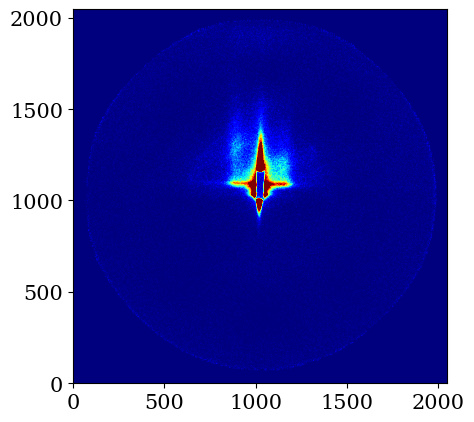

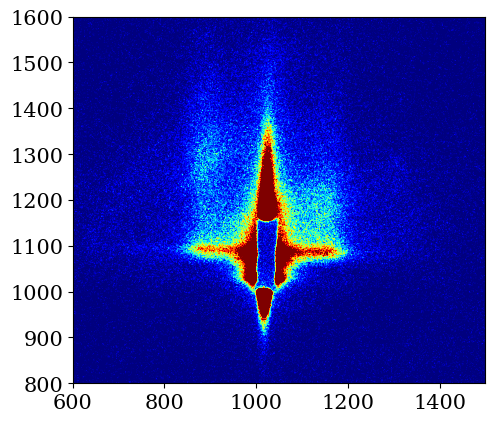

In [20]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img,vmin=0,vmax=1.8e2,origin='lower',cmap='jet')

fig, ax = plt.subplots()

# Display the image
ax.imshow(img,vmin=0,vmax=1.8e2,origin='lower',cmap='jet')
ax.set_xlim(600,1500)
ax.set_ylim(800,1600)

plt.show()

#### 2.3.3. Rotate the frame to correct the sample tilt on the GISAXS stage

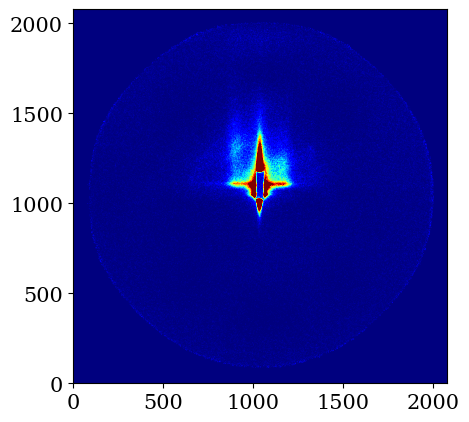

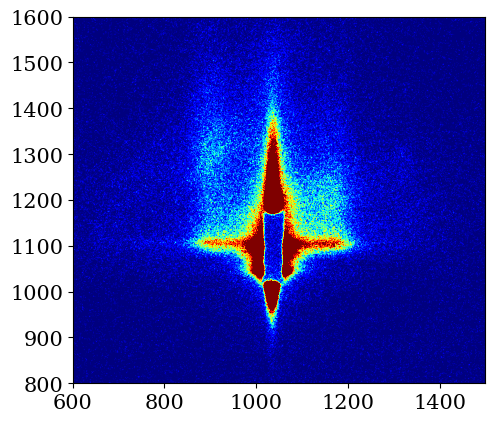

In [21]:
########User Input Starts########
detector_virtual_rotation = -0.8931816039018026 # degree
########User Input Ends########

img_rot = rotate(img, angle=detector_virtual_rotation)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
# ax.imshow(np.flip(img_rot,0),vmin=0,vmax=1.8e2,origin='lower',cmap='jet')
ax.imshow(img_rot,vmin=0,vmax=1.8e2,origin='lower',cmap='jet')

fig, ax = plt.subplots()

# Display the image
ax.imshow(img_rot,vmin=0,vmax=1.8e2,origin='lower',cmap='jet')
ax.set_xlim(600,1500)
ax.set_ylim(800,1600)

plt.show()

## 3. Define the Region of Interest (ROI)

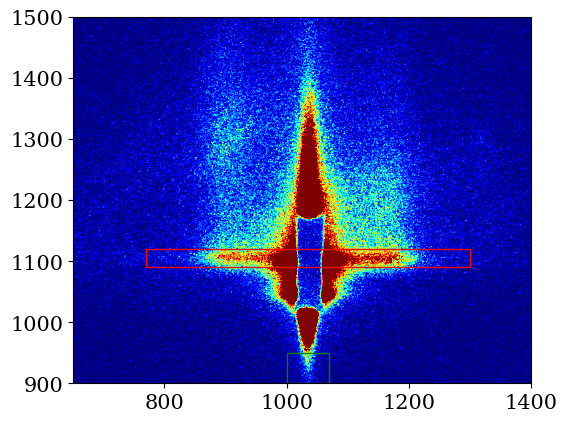

In [23]:
########User Input Starts########
top = 1120
bottom = 1090
left = 770
right = 1300

top_direct = 950
bottom_direct = 900
left_direct = 1000
right_direct = 1070
########User Input Ends########

xslice = [left,right]
yslice = [bottom,top]

%matplotlib inline

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_rot,vmin=0,vmax=1.8e2,origin='lower',cmap='jet')

# Create a Rectangle patch
rect1 = patches.Rectangle((xslice[0], yslice[0]), xslice[1]-xslice[0], yslice[1]-yslice[0], linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((left_direct, bottom_direct), right_direct-left_direct, top_direct-bottom_direct, linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

ax.set_xlim(650,1400)
ax.set_ylim(900,1500)


save = True

file_name = save_master_filename + '_ROI'

if save:
    fp = data_dir + '/' + file_name + '.png'
    plt.savefig(fp,bbox_inches='tight',transparent=True)

plt.show()

## 4. Re-define the beam center x (and x0) based on the reflected beam

In [28]:
The_slice = np.average(img_rot[bottom_direct:top_direct,left_direct:right_direct], axis=0)
index_max_x = np.argmax(The_slice) + left_direct
x0 = index_max_x

## 5. Get I vs q//

C:\Users\benli_jiang\Documents\N8-GISAXS\GISAXS_static_analysis_for_N8_Horizon_v1.1.py:118: RuntimeWarning: invalid value encountered in sqrt
  alpha_i_prime = np.sqrt(alpha_i**2-alpha_c**2)


qz and y_avg are 0.41 1105
Saving in respective folder.


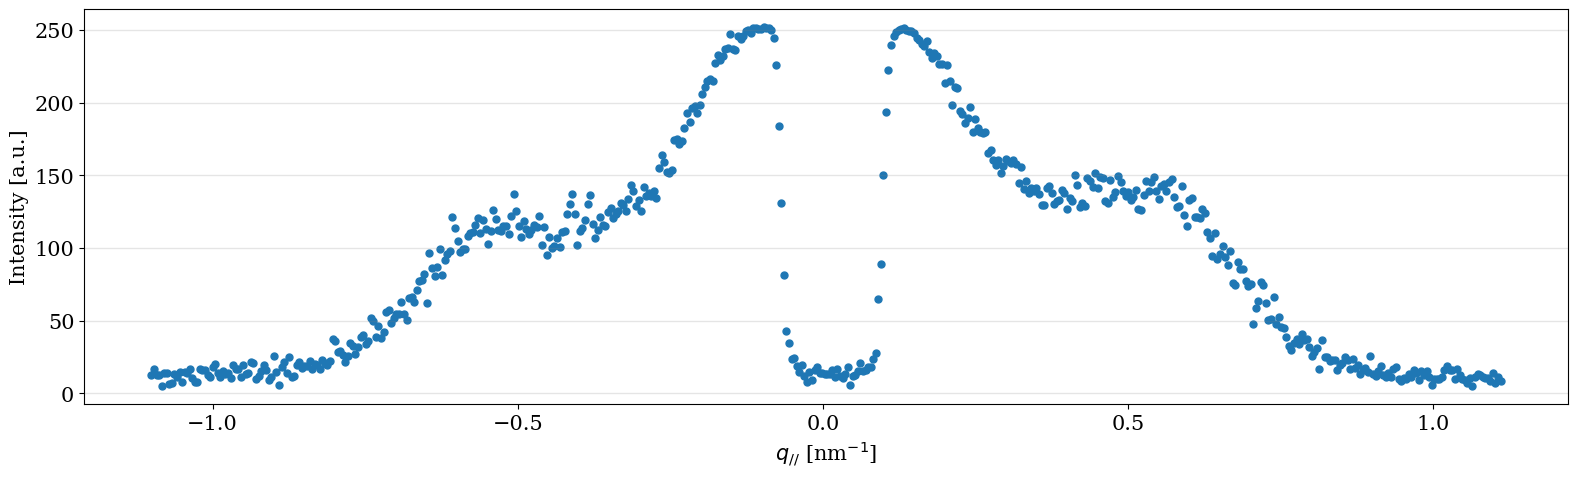

In [29]:
pixelinfo,sq = get_ROI_Ivsq_avg(img_rot, xslice, yslice, logscale=False, save=True)